In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import subprocess
import os

pd.set_option('display.max.rows', 500)

* RKI, webscrape (webscraping) https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html/
* John Hopkins (GITHUB) https://github.com/CSSEGISandData/COVID-19
* REST API services to retrieve data https://npgeo-corona-npgeo-de.hub.arcgis.com/

## Data from Github

git clone/pull: https://github.com/CSSEGISandData/COVID-19.git

In [2]:
# Update Data by git pull from: https://github.com/CSSEGISandData/COVID-19.git

git_pull = subprocess.Popen( "/usr/bin/git pull" , 
                     cwd = os.path.dirname( './ads_covid-19/data/raw/COVID-19/' ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()
print("Error : " + str(error)) 
print("out : " + str(out))


Error : b'From https://github.com/CSSEGISandData/COVID-19\n   73340c1271..cc4f9b9908  web-data   -> origin/web-data\n'
out : b'Already up to date.\n'


In [3]:
# Create an dictionary with the Number of Inhibitants of the corresponding country
# Sources: Italy: https://de.statista.com/statistik/daten/studie/19304/umfrage/gesamtbevoelkerung-in-italien/
#          US: https://de.statista.com/statistik/daten/studie/19320/umfrage/gesamtbevoelkerung-der-usa/
#          Germany: https://de.statista.com/statistik/daten/studie/1217/umfrage/entwicklung-der-gesamtbevoelkerung-seit-2002/
inhibitants = {
    'Italy':'59190000',
    'US':'333390000',
    'Germany':'83200000'
}

In [4]:
# read data from csv file
data_path = './ads_covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,179624,179674,179716,179716,179771,179835,179835,180086,180122,180174
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,275732,275838,275864,275881,275939,275985,276012,276048,276081,276101
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265847,265851,265854,265855,265860,265862,265864,265870,265873,265873
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,42572,42572,42572,42572,42572,42894,42894,42894,42894,42894
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99433,99527,99527,99527,99527,99527
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,7910,7942,7942,7982,7982,8062,8119,8119,8119,8119
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9135308,9135308,9178795,9178795,9178795,9178795,9178795,9178795,9178795,9230573
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,422917,422917,422917,422939,422939,422939,422939,422939,422939,422939
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,124477,125220,125828,126633,127556,128440,129263,130085,130664,130664


In [5]:
# put dates of pd_raw into time_idx
time_idx = pd_raw.columns[4:]

In [6]:
# create DataFrame
df_plot = pd.DataFrame({'date':time_idx})
df_plot

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
...,...
854,5/25/22
855,5/26/22
856,5/27/22
857,5/28/22


In [7]:
# choose countries we want to plot
country_list = ['Italy',
                'US',
                'Germany'
]

In [8]:
# calculate relative cases over time and put it into df_plot
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region'] == each].iloc[:,4::].sum(axis=0)/int(inhibitants[each]))

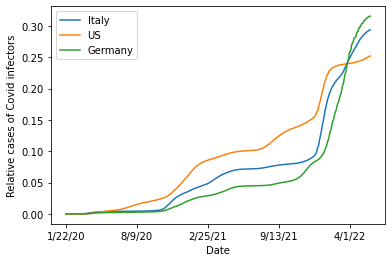

In [11]:
# create plot and save as jpg
ax = df_plot.set_index('date').plot()

ax.set_ylabel('Relative cases of Covid infectors')
ax.set_xlabel('Date')

plt.savefig('relative-cases-over-time.jpg', dpi=300)